In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
sns.set_palette("tab10")

# Clustering

## Blobs

In [ ]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=1)

In [ ]:
df = pd.DataFrame(X, columns=['a','b'])

<AxesSubplot:xlabel='a', ylabel='b'>

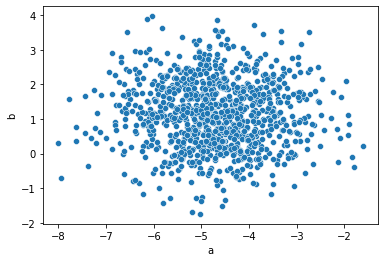

In [ ]:
sns.scatterplot(data=df,x='a',y='b')

## Moons

In [ ]:
X, y = make_moons(1000, noise=0.05)
df = pd.DataFrame(X, columns=['a','b'])

<AxesSubplot:xlabel='a', ylabel='b'>

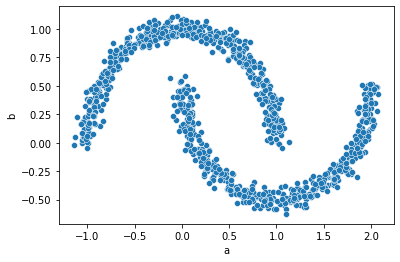

In [ ]:
sns.scatterplot(data=df, x='a', y='b')

### KMeans

In [ ]:
kmeans = KMeans(n_clusters=2).fit(df[['a','b']])
df['kmeans'] = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:xlabel='a', ylabel='b'>

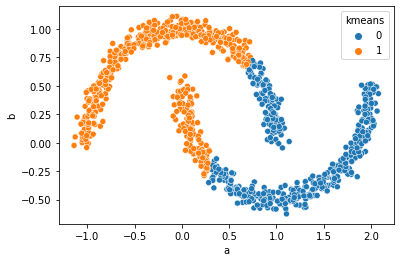

In [ ]:
sns.scatterplot(data=df, x='a', y='b', hue='kmeans')

### DBSCAN

In [ ]:
dbs = DBSCAN(eps=0.2).fit(df[['a','b']])
df['dbs'] = dbs.labels_

<AxesSubplot:xlabel='a', ylabel='b'>

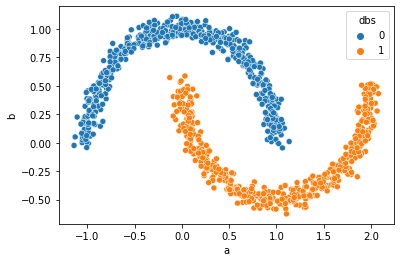

In [ ]:
sns.scatterplot(data=df,x='a',y='b',hue='dbs')

# Association Rule

## Apriori

In [ ]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Stripping extra spaces in the description
df['Description'] = df['Description'].str.strip()
  
# Dropping the rows without any invoice number
df.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
  
# Dropping all transactions which were done on credit
df = df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
# Transactions done in France
basket_France = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
  
# Transactions done in the United Kingdom
basket_UK = (df[df['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
  
# Transactions done in Portugal
basket_Por = (df[df['Country'] =="Portugal"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
  
basket_Sweden = (df[df['Country'] =="Sweden"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [ ]:
basket_France

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Defining the hot encoding function to make the data suitable 
# for the concerned libraries
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
  
# Encoding the datasets
basket_encoded = basket_France.applymap(hot_encode)
basket_France = basket_encoded
  
basket_encoded = basket_UK.applymap(hot_encode)
basket_UK = basket_encoded
  
basket_encoded = basket_Por.applymap(hot_encode)
basket_Por = basket_encoded
  
basket_encoded = basket_Sweden.applymap(hot_encode)
basket_Sweden = basket_encoded

# Dimensionality Reduction

In [ ]:
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [ ]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_wine = red_wine.astype('category')

In [ ]:
X = red_wine.iloc[:,:-1]
y = red_wine.iloc[:,-1]

## PCA

In [ ]:
X.shape

(1599, 11)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduce = pca.transform(X)

In [ ]:
X_reduce.shape

(1599, 2)

In [ ]:
df_pca = pd.DataFrame(X_reduce, columns=['component 1','component 2'])
df_pca.head()

,component 1,component 2
0,-13.224905,-2.023900
1,22.037724,4.408322
2,7.162673,-2.501461
3,13.430063,-1.951122
4,-13.224905,-2.023900


In [ ]:
df_pca['quality'] = red_wine['quality']

<AxesSubplot:xlabel='component 1', ylabel='component 2'>

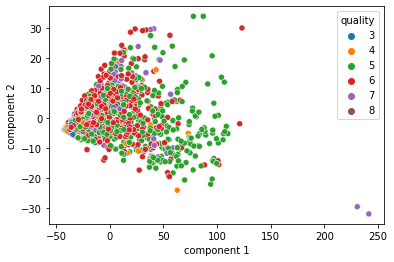

In [ ]:
sns.scatterplot(data=df_pca,x='component 1', y='component 2', hue='quality')

## LDA

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X,y)

In [ ]:
df_lda = pd.DataFrame(X_lda, columns=['components 1', 'components 2'])
df_lda['quality'] = red_wine['quality']

<AxesSubplot:xlabel='components 1', ylabel='components 2'>

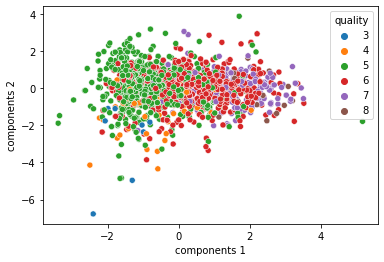

In [ ]:
sns.scatterplot(data=df_lda,x='components 1', y='components 2', hue='quality')